# Writing Functions and Loops

## 4. Now it's your turn

In this WPA, you will analyze data from another fake study. In this fake study the researchers were interested in whether playing video games had cognitive benefits compared to other leisure activities. In the study, 90 University students were asked to do one of 3 leisure activities for 1 hour a day for the next month. 30 participants were asked to play visio games, 30 to read and 30 to juggle. At the end of the month each participant did 3 cognitive tests, a problem solving test (**logic**) and a reflex/response test (**reflex**) and a written comprehension test (**comprehension**).

#### Datafile description

The data file has 90 rows and 7 columns. Here are the columns

- `id`: The participant ID

- `age`: The age of the participant

- `gender`: The gender of the particiant

- `activity`: Which leisure activity the participant was assigned for the last month ("reading", "juggling", "gaming")

- `logic`: Score out of 120 on a problem solving task. Higher is better.

- `reflex`: Score out of  25 on a reflex test. Higher indicates faster reflexes.

- `comprehension`: Score out of 100 on a reading comprehension test. Higher is better.

**Task A**

1. Load the `data_wpa12.txt` dataset in R (find them on Github) and save it as a new object called `leisure`. Inspect the dataset first.

2. Write a function called `feed_me()` that takes a string `food` as an argument, and returns (in case `food = 'pizza'`) the sentence "I love to eat pizza". Try your function by running `feed_me("apples")` (it should then return "I love to eat apples").

3. Without using the `mean()` function, calculate the mean of the vector `vec_1 = seq(1, 100, 5)`.

4. Write a function called `my_mean()` that takes a vector `x` as an argument, and returns the mean of the vector `x`. Use your code for task A3 as your starting point. Test it on the vector from task A3.

5. Try your `my_mean()` function to calculate the mean 'logic' rating of participants in the `leisure` dataset and compare the result to the built-in `mean()` function (using `==`) to make sure you get the same result.

6. Create a loop that prints the squares of integers from 1 to 10.

7. Modify the previous code so that it saves the squared integers as a vector called `squares`. You'll need to pre-create a vector, and use indexing to update it.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
leisure = read_delim('~/git/r-course2020/data/data_wpa12.txt', delim='\t')
head(leisure)


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  index = col_double(),
  id = col_double(),
  age = col_double(),
  gender = col_character(),
  activity = col_character(),
  logic = col_double(),
  reflex = col_double(),
  comprehension = col_double()
)




index,id,age,gender,activity,logic,reflex,comprehension
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,26,m,reading,88,13.7,72
2,2,31,m,reading,85,11.8,83
3,3,38,m,reading,82,5.8,67
4,4,24,m,reading,102,18.0,66
5,5,30,f,reading,48,14.0,62
6,6,31,m,reading,61,14.1,58


In [3]:
feed_me = function(food) {
    print(paste("I love to eat", food))
}

feed_me("apples")

[1] "I love to eat apples"


In [4]:
vec_1 = seq(1, 100, 5)

sum(vec_1)/length(vec_1)

my_mean = function(x) {
    return(sum(x)/length(x))
}

my_mean(vec_1)

[1] 48.5

[1] 48.5

In [5]:
my_mean(leisure$logic) == mean(leisure$logic)

[1] TRUE

In [6]:
for (i in 1:10) {
    print(i**2)
}

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25
[1] 36
[1] 49
[1] 64
[1] 81
[1] 100


In [7]:
squares = rep(NA, 10)

for (i in 1:10) {
    squares[i] = i**2
}

squares

[1]   1   4   9  16  25  36  49  64  81 100

**Task B**

1. Create a function called `standardize`, that, given an input vector, returns its standardized version. Remember that to normalize a score, also called z-transforming it, you first subtract the mean score from the individual scores and then divide by the standard deviation.

2. Create a copy of the `leisure` dataset. Call this copy `z_leisure`. Normalise the `logic`, `reflex`, `age` and `comprehension` columns using the `standardize` function using a `for` loop. In each iteration of the loop, you should standardize one of these 4 columns. You can create a vector first, called `columns_to_standardize` where you store these columns and use them later in the loop. You should not add them as additional columns, but overwrite the original columns.

In [8]:
standardize = function(x) {
    demeaned = x - mean(x, na.rm = TRUE)
    st_deviation = sd(x, na.rm = TRUE)
    z_score = demeaned/st_deviation
    
    return (z_score)
}

In [9]:
z_leisure = leisure

head(z_leisure)

index,id,age,gender,activity,logic,reflex,comprehension
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,26,m,reading,88,13.7,72
2,2,31,m,reading,85,11.8,83
3,3,38,m,reading,82,5.8,67
4,4,24,m,reading,102,18.0,66
5,5,30,f,reading,48,14.0,62
6,6,31,m,reading,61,14.1,58


In [10]:
columns_to_standardize = c("logic", "reflex", "age", "comprehension")

for (col in columns_to_standardize) {
    z_leisure[,col] = standardize(pull(z_leisure[,col])) # NOTE: the pull function is hte safest way to get a vector out of a tibble
    # alternatively you can also use z_leisure[[col]]
}

head(z_leisure)

index,id,age,gender,activity,logic,reflex,comprehension
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,-0.68313327,m,reading,1.1396291,-0.4241210,0.57581905
2,2,0.19019051,m,reading,0.9621782,-1.0180988,1.28928696
3,3,1.41284381,m,reading,0.7847273,-2.8938183,0.25151546
4,4,-1.03246279,m,reading,1.9677332,0.9201446,0.18665474
5,5,0.01552576,f,reading,-1.2263828,-0.3303350,-0.07278814
6,6,0.19019051,m,reading,-0.4574290,-0.2990730,-0.33223102


**Task C**

1. Create a scatterplot of `age` and `reflex` of participants in the `leisure` datset. Cutomise it and add a regression line.

2. Create a function called `my_plot()` that takes arguments `x` and `y` and returns a customised scatterplot with your customizations and the regression line.

3. Now test your `my_plot()` function on the `age` and `reflex` of participants in the `leisure` dataset.

In [11]:
# Ignore this (only for notebooks):
library(repr)
options(repr.plot.width=10, repr.plot.height=5)

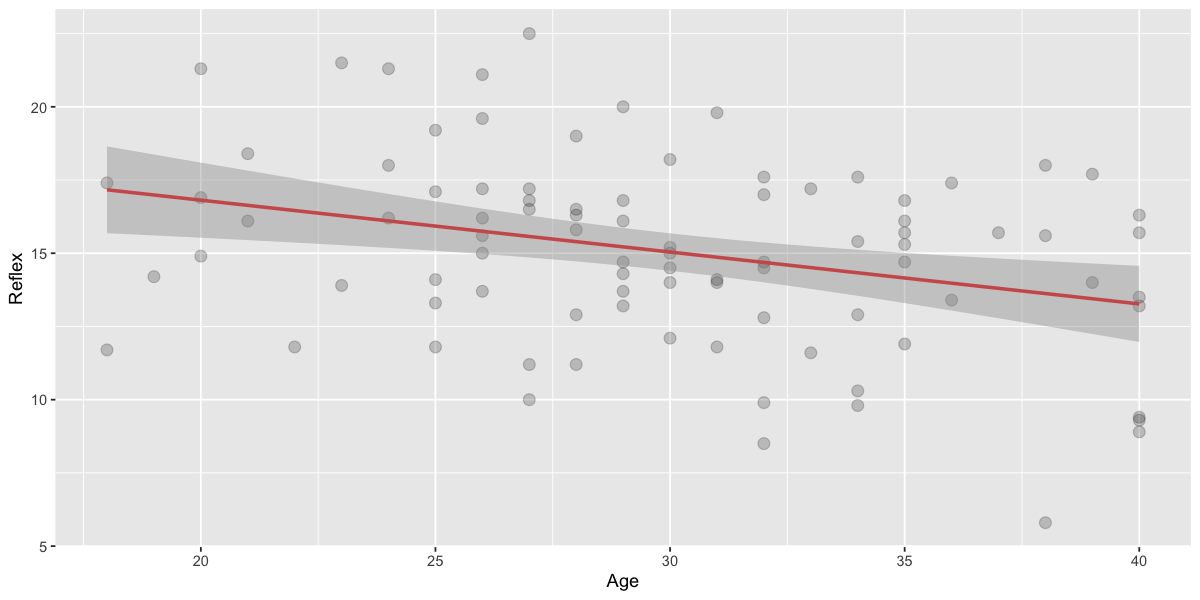

In [12]:
ggplot(data = leisure, mapping = aes(x = age, y = reflex)) + 
    geom_point(alpha = 0.2, size= 3) +
    geom_smooth(method = lm, color='indianred') +
    labs(x='Age', y='Reflex')

In [13]:
my_plot = function(x, y) {
    g = ggplot(mapping = aes(x = x, y = y)) + 
        geom_point(alpha = 0.2, size= 3) +
        geom_smooth(method = lm, color='indianred')
    
    return(g)
}

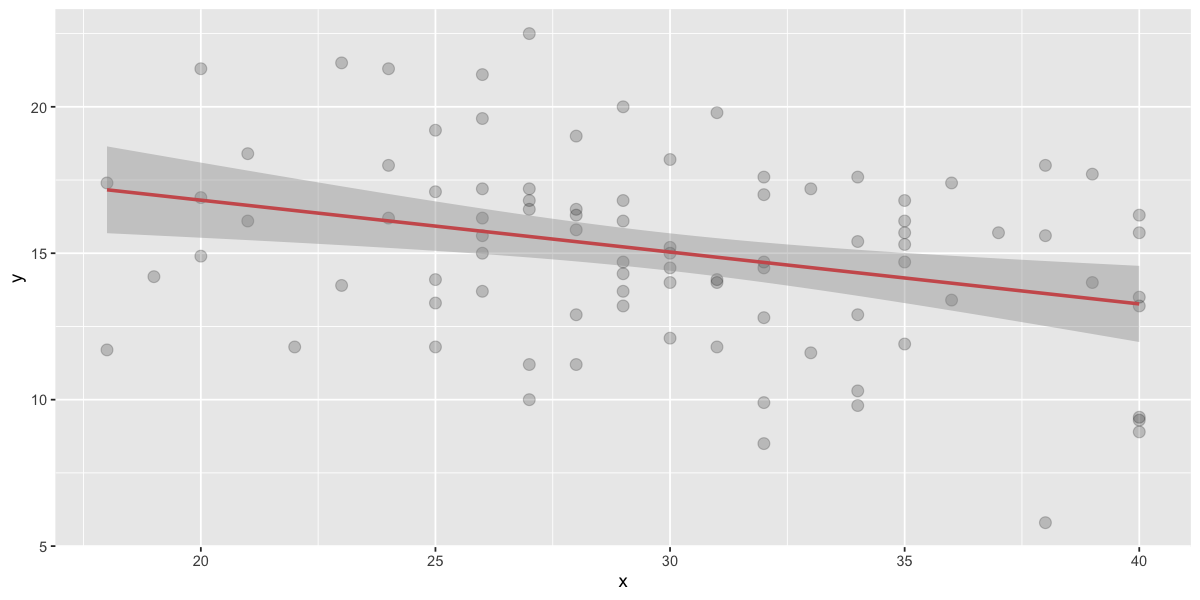

In [14]:
my_plot(leisure$age, leisure$reflex)

**Task D**

1. Create a loop that returns the sum of the vector `1:10`. (i.e. Don't use the existing `sum` function).
2. Use this loop to create a function, called `my_sum` that returns the sum of any vector x. Test it on the `logic` ratings.
3. Modify the function you created in task D2, to instead calculate the mean of a vector. Call this new function `my_mean2` and compare it to both the `my_mean` function you created, and the in-built `mean` function. (Bonus: Can you also think of a way to do this without using the the length function)

In [15]:
final_sum = 0

for (i in 1:10) {
    final_sum = final_sum + i
    print(final_sum)
}

final_sum

sum(1:10)

[1] 1
[1] 3
[1] 6
[1] 10
[1] 15
[1] 21
[1] 28
[1] 36
[1] 45
[1] 55


[1] 55

[1] 55

In [16]:
my_sum = function(x) {
    final_sum = 0
    
    for (i in x){
        final_sum = final_sum + i
    }
    
    return(final_sum)
}

my_sum(leisure$logic)

sum(leisure$logic)

[1] 6186

[1] 6186

In [17]:
my_mean2 = function(x) {
    final_sum = 0
    final_length = 0
    
    for (i in x){
      final_sum = final_sum + i
      final_length = final_length + 1
    }
    
    return(final_sum/final_length)
    #return(final_sum/length(x))
}

my_mean(leisure$logic)

my_mean2(leisure$logic)

mean(leisure$logic)

[1] 68.73333

[1] 68.73333

[1] 68.73333

**Task E**

1. What is the probability of getting a significant p-value if the null hypothesis is true? Test this by conducting the following simulation:

  - Create a vector called `p_values` with 100 NA values. 
  - Draw a sample of size 10 from a normal distribution with mean = 0 and standard deviation = 1.
  - Do a one-sample t-test testing if the mean of the distribution is different from 0. Save the p-value from this test in the 1st position of `p_values`.
  - Repeat these steps with a loop to fill `p_values` with 100 p-values.
  - Create a histogram of `p_values` and calculate the proportion of p-values that are significant at the .05 level.

2. Create a function called `p_simulation` with 4 arguments: `sim`: the number of simulations, `samplesize`: the sample size, `mu_true`: the true mean, and `sd_true`: the true standard deviation. Your function should repeat the simulation from the previous question with the given arguments. That is, it should calculate `sim` p-values testing whether `samplesize` samples from a normal distribution with mean = `mu_true` and standard deviation = `sd_true` is significantly different from 0. The function should return a vector of p-values. 

*Note*: to get the p-value of a t-test:

In [18]:
p_values = rep(NA, 100)

sample = rnorm(mean=0, sd=1, n=10)

p_values[1] = t.test(sample)$p.value

p_values[1]

[1] 0.9851534

In [19]:
p_values = rep(NA, 100)

for (i in 1:100) {
    
    sample = rnorm(mean=0, sd=1, n=10)

    p_values[i] = t.test(sample)$p.value
    
}

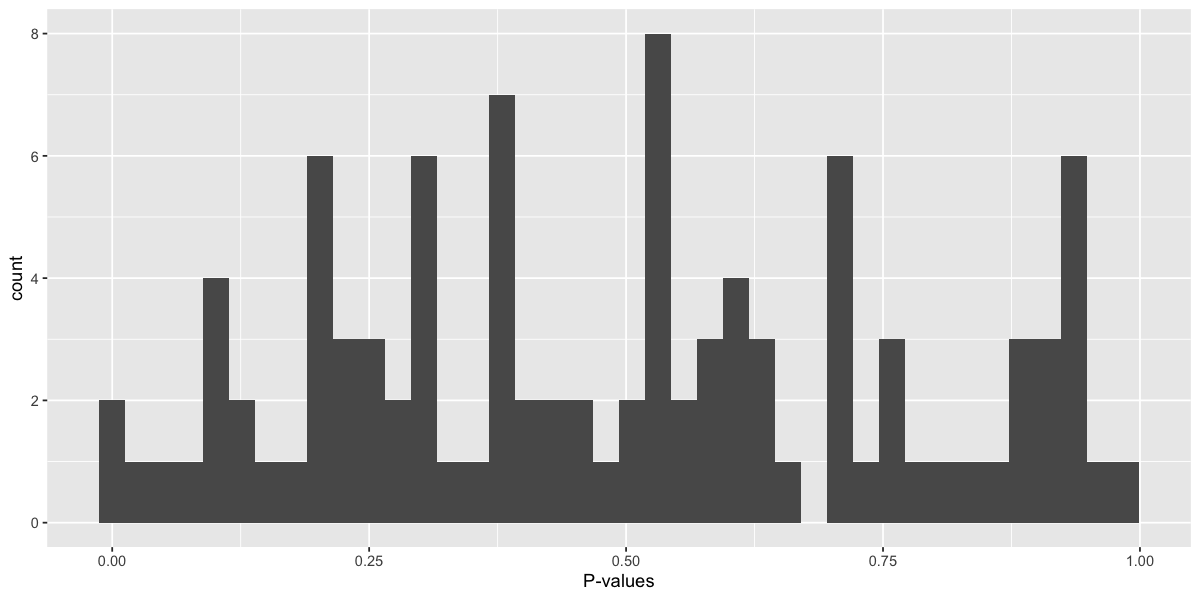

In [20]:
ggplot(mapping = aes(x = p_values)) + 
    geom_histogram(bins = 40) +
    labs(x = 'P-values')

In [21]:
mean(p_values < .05)*100 # percentage of significant tests

[1] 4

In [22]:
p_simulation = function(sim, samplesize, mu_true, sd_true) {
    
    p_values = rep(NA, sim)

    for (i in 1:sim) {

        sample = rnorm(mean=mu_true, sd=sd_true, n=samplesize)

        p_values[i] = t.test(sample)$p.value

    }
    
    return(p_values)
}

In [23]:
p_values = p_simulation(sim=1000, samplesize=100, mu_true=0, sd_true=1)

In [24]:
mean(p_values < .05)*100

[1] 4.9